In [4]:
!pip install -U scikit-image

     |████████████████████████████████| 30.1MB 3.3MB/s eta 0:00:01    |█▎                              | 1.2MB 998kB/s eta 0:00:29     |██████████████▉                 | 13.9MB 7.6MB/s eta 0:00:03
  Found existing installation: scikit-image 0.13.1
    Uninstalling scikit-image-0.13.1:
      Successfully uninstalled scikit-image-0.13.1
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import skimage
from skimage import io

import numpy as np
import math

import matplotlib
import matplotlib.pyplot as plt

## Images are numpy arrays
Images are represented in scikit-image using standard numpy arrays. 

#### Building a grayscale image as a 2D array

In [2]:
random_image = np.random.random([500, 500])

In [3]:
random_image

array([[0.87278166, 0.06600739, 0.15674539, ..., 0.03765919, 0.78030932,
        0.88756216],
       [0.51626574, 0.32133506, 0.96621171, ..., 0.9553605 , 0.61090732,
        0.31061187],
       [0.46083265, 0.90904736, 0.93126929, ..., 0.9476443 , 0.88943317,
        0.14277822],
       ...,
       [0.03768553, 0.46622877, 0.99723719, ..., 0.75290088, 0.30260235,
        0.35276885],
       [0.84184594, 0.14112813, 0.84361333, ..., 0.50688529, 0.00879466,
        0.24632436],
       [0.65954045, 0.41820544, 0.66860891, ..., 0.21830139, 0.1413069 ,
        0.24058509]])

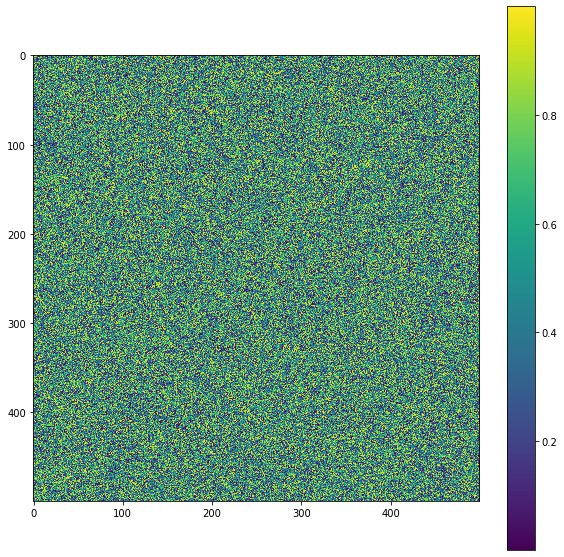

In [4]:
plt.figure(figsize = (10, 10))
plt.imshow(random_image)
plt.colorbar();

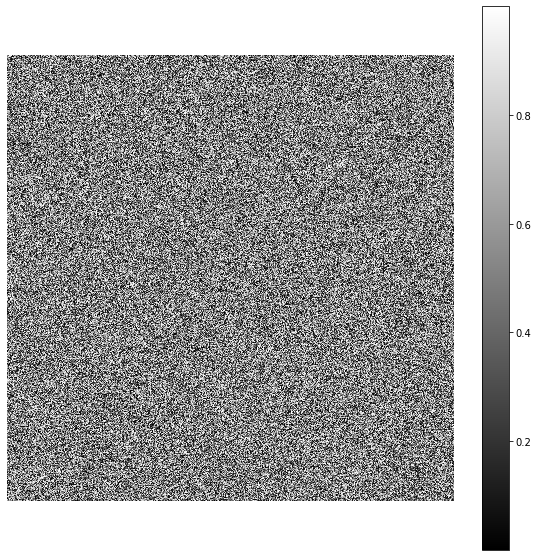

In [5]:
plt.figure(figsize = (10, 10))
plt.imshow(random_image, cmap='gray')
plt.axis('off')
plt.colorbar();

### Loading a gray scale image from ``scikit-image.data module``

In [6]:
from skimage import data

In [7]:
camera = data.camera()

In [8]:
camera

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (512, 512)
size: 262144


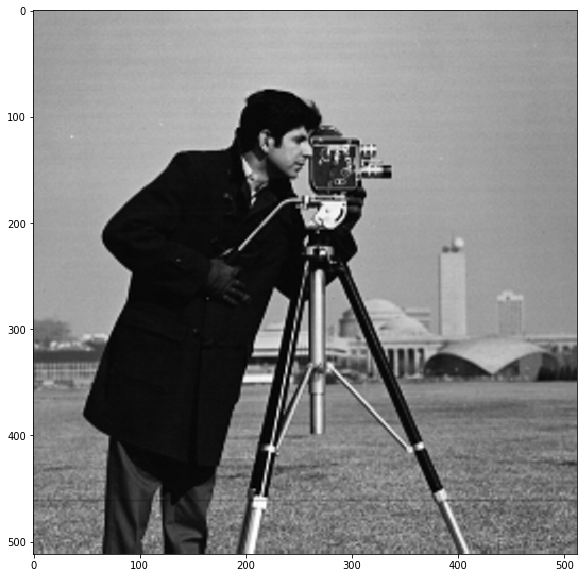

In [10]:
print('Type:', type(camera))
print('dtype:', camera.dtype)
print('shape:', camera.shape)
print('size:', camera.size)

plt.figure(figsize = (10, 10))
plt.imshow(camera, cmap='gray');

## Reading images

https://www.pexels.com/photo/2388912/

In [12]:
chessboard = io.imread('datasets/images/chessboard.jpg')

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (2048, 2048, 3)
size: 12582912


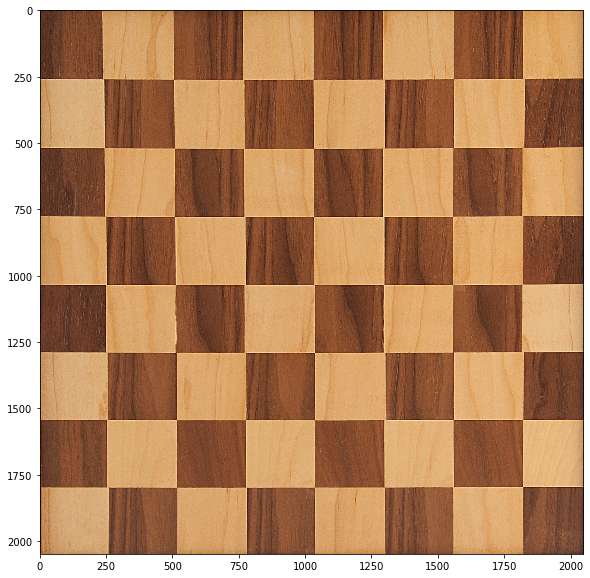

In [14]:
print('Type:', type(chessboard))
print('dtype:', chessboard.dtype)
print('shape:', chessboard.shape)
print('size:', chessboard.size)

plt.figure(figsize = (10, 10))
plt.imshow(chessboard, cmap='gray');

#### These are just numpy arrays, by standard array slicing we can get a desired verticle line or a square box


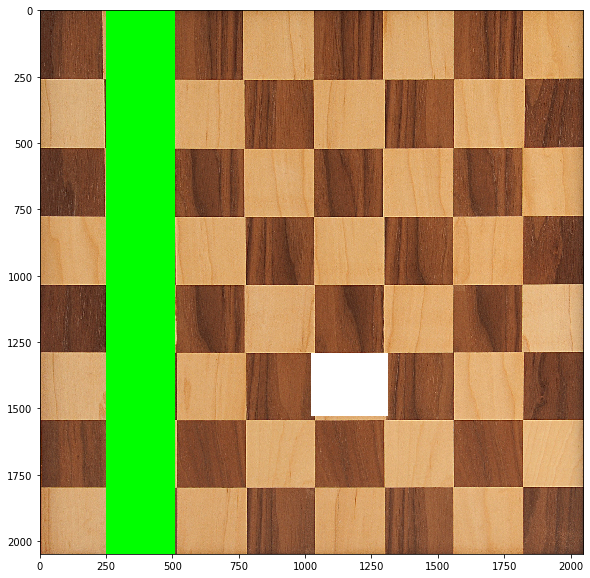

In [36]:
chessboard[:, 250:510] = [0, 255, 0]
chessboard[1290:1530, 1020:1310, :] = [255, 255, 255]

plt.figure(figsize = (10, 10))
plt.imshow(chessboard)
plt.show()

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

In [37]:
sample_1 = np.linspace(0, 1, 1600).reshape((40, 40))
sample_2 = np.linspace(0, 255, 1600).reshape((40, 40)).astype(np.uint8)

In [38]:
print("sample_1:", sample_1.dtype, sample_1.min(), sample_1.max())
print("sample_2:", sample_2.dtype, sample_2.min(), sample_2.max())

sample_1: float64 0.0 1.0
sample_2: uint8 0 255


In [42]:
sample_1[:2]

array([[0.        , 0.00062539, 0.00125078, 0.00187617, 0.00250156,
        0.00312695, 0.00375235, 0.00437774, 0.00500313, 0.00562852,
        0.00625391, 0.0068793 , 0.00750469, 0.00813008, 0.00875547,
        0.00938086, 0.01000625, 0.01063164, 0.01125704, 0.01188243,
        0.01250782, 0.01313321, 0.0137586 , 0.01438399, 0.01500938,
        0.01563477, 0.01626016, 0.01688555, 0.01751094, 0.01813634,
        0.01876173, 0.01938712, 0.02001251, 0.0206379 , 0.02126329,
        0.02188868, 0.02251407, 0.02313946, 0.02376485, 0.02439024],
       [0.02501563, 0.02564103, 0.02626642, 0.02689181, 0.0275172 ,
        0.02814259, 0.02876798, 0.02939337, 0.03001876, 0.03064415,
        0.03126954, 0.03189493, 0.03252033, 0.03314572, 0.03377111,
        0.0343965 , 0.03502189, 0.03564728, 0.03627267, 0.03689806,
        0.03752345, 0.03814884, 0.03877423, 0.03939962, 0.04002502,
        0.04065041, 0.0412758 , 0.04190119, 0.04252658, 0.04315197,
        0.04377736, 0.04440275, 0.04502814, 0.0

In [43]:
sample_2[:2]

array([[ 0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
         5,  5,  5,  5,  5,  5,  6,  6],
       [ 6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 12, 12, 12, 12]], dtype=uint8)

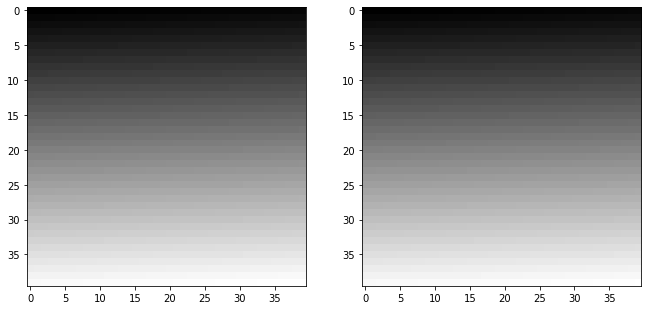

In [44]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(11, 11))
ax0.imshow(sample_1, cmap='gray')
ax1.imshow(sample_2, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [19]:
from skimage import img_as_float, img_as_ubyte

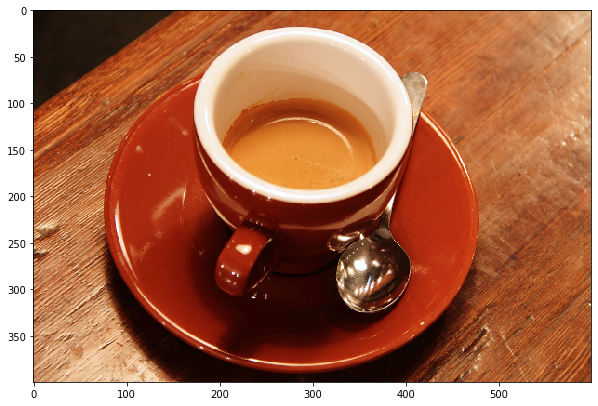

In [20]:
image = data.coffee()
plt.figure(figsize = (10, 10))
plt.imshow(image);

In [21]:
image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

In [22]:
print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("255/255 =", 255/255.)

type, min, max: uint8 0 255
type, min, max: float64 0.0 1.0

255/255 = 1.0


## Visualizing RGB channels</span>

Displaying the different color channels of the image along (each as a gray-scale image).

### Reading the images

In [23]:
from skimage import color, img_as_float = io.imread('datasets/images/machu_pichho_peru.jpg')

### Asigning each color channel to a different variable

In [24]:
r = image[:, :, 0]
g = image[:, :, 1]
b = image[:, :, 2]

### Displaying the image and r, g, b channels

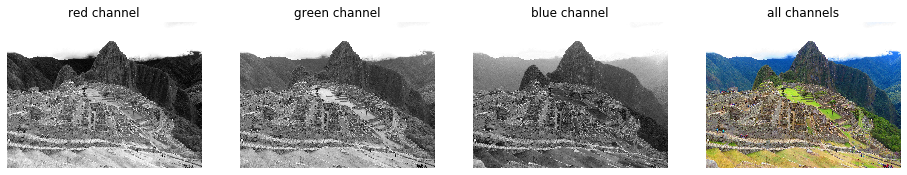

In [27]:
f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');